# Train embedding

Here we train embeddings of papers to be used for later.

Two embedding trained: 

1. Only labeled data 
2. All data


In [1]:
import logging
import os
import pandas as pd
import numpy as np

def dummy(doc):
    return doc

import com_func

Dataset = "pubmed"

# print log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# sample size (number of papers (instance))
training_sample_size = "140k"
# parameter that check the frequence of token occurs (if less than cutoff, throw away)
cutoff = 2

In [2]:
# if only train with labeled samples
if training_sample_size == "140k":
    flie_path = "Data/"+Dataset+"/id_text_combined_labeled.txt"
elif training_sample_size == "3m":
    flie_path = "Data/"+Dataset+"/id_text_combined.txt"

In [3]:
# collect cleaned tokenized data for vectorization
def readallfile(filepath):
    documents = []
    with open(filepath, 'r', encoding = 'utf8') as f:
        for line in f:
            items = line.split("\t")
            paperID = items[0]
            title = items[1].lower()
            keywords = items[2].lower()
            mesh = items[3].lower()
            abstract = items[4].lower()
            # keyword and mesh
            key_mesh = keywords+" "+mesh
            # title and abstract
            text = title+" "+abstract
            paper_text_content = {"paperID": paperID, "title":title, "abstract": abstract, "keywords_mesh":key_mesh,
                                  "text":text}
            documents.append(paper_text_content)
    f.close()
    print("Done loading files, total ", len(documents), " papers")
    documents = pd.DataFrame(documents)
    return documents

documents = readallfile(flie_path)
allpid = documents["paperID"].tolist()

Done loading files, total  135796  papers


In [11]:
text_features = ["title", "abstract", "keywords_mesh", "text"]
#text_features = ["title"]
text_process_status = "after_preprocess"

Feature:  title average token length: 10.309537836166013
max token length:  55
min token length:  0
135796
[['energetics', 'primary', 'processes', 'visula', 'escitation', 'photocalorimetry', 'rhodopsin', 'rod', 'outer', 'segment', 'membranes'], ['ultrastructural', 'features', 'osmotic', 'shock', 'mussel', 'gill', 'cilia']]
['8077', '17755']
[(0, 29), (1, 73), (2, 441), (3, 1144), (4, 2739), (5, 5134), (6, 8329), (7, 11760), (8, 14403), (9, 15809), (10, 15695), (11, 14487), (12, 12396), (13, 9815), (14, 7446), (15, 5333), (16, 3770), (17, 2426), (18, 1621), (19, 1034), (20, 706), (21, 446), (22, 250), (23, 180), (24, 113), (25, 65), (26, 51), (27, 28), (28, 26), (29, 7), (30, 7), (31, 4), (32, 7), (33, 4), (34, 3), (35, 2), (36, 3), (37, 1), (39, 2), (43, 1), (46, 1), (47, 2), (50, 1), (54, 1), (55, 1)]


/home/gao137/intel/intelpython3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


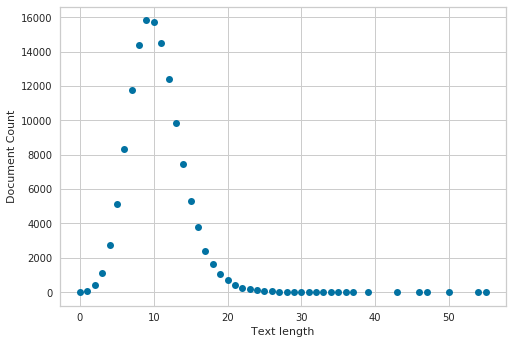

(135796, 67905)


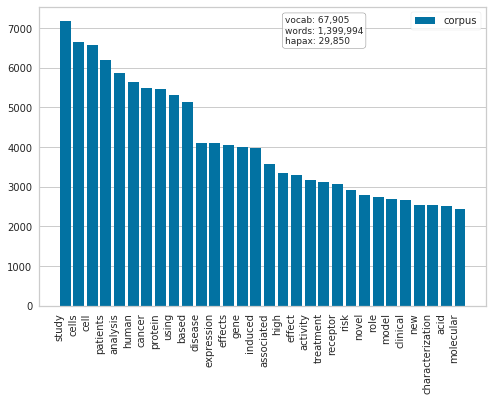

Feature:  abstract average token length: 116.9032372087543
max token length:  597
min token length:  0
135796
[['sensitive', 'technique', 'direct', 'calorimetric', 'determination', 'energetics', 'photochemical', 'reactions', 'low', 'levels', 'illumination', 'application', 'study', 'primary', 'processes', 'visula', 'excitation', 'described', 'enthlpies', 'reported', 'various', 'steps', 'bleaching', 'rhodopsin', 'intact', 'rod', 'outer', 'segment', 'membranes', 'together', 'heats', 'appropriate', 'model', 'reactions', 'protonation', 'changes', 'also', 'determined', 'calorimetrically', 'use', 'buffers', 'differing', 'heats', 'proton', 'ionization', 'bleaching', 'rhodopsin', 'accompanied', 'significant', 'uptake', 'heat', 'energy', 'vastly', 'excess', 'energy', 'required', 'simple', 'isomerization', 'retinal', 'chromophore', 'metarhodopsin', 'formation', 'involves', 'uptake', 'kcal', 'mol', 'net', 'change', 'proton', 'ionization', 'system', 'formation', 'metarhodopsin', 'ii', 'requires', '

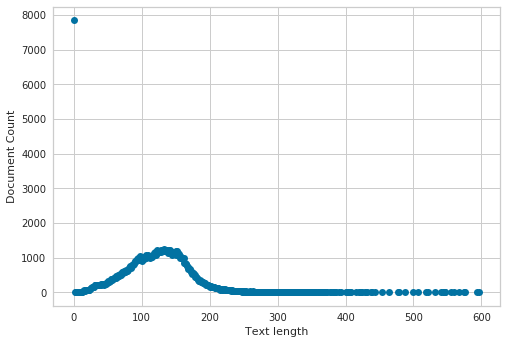

(135796, 171037)


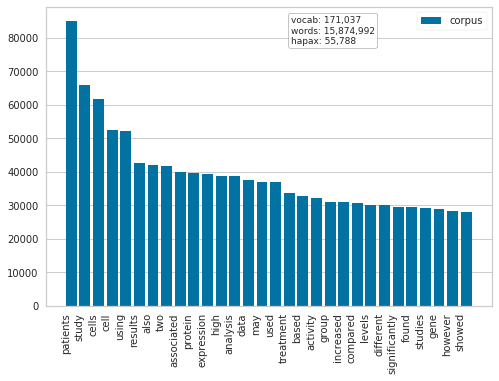

Feature:  keywords_mesh average token length: 20.559265368641196
max token length:  424
min token length:  0
135796
[['animals', 'binding', 'sites', 'calorimetry', 'cattle', 'ferric', 'compounds', 'hydrogen', 'ion', 'concentration', 'hydroxylamines', 'light', 'lysine', 'models', 'biological', 'oxalates', 'photochemistry', 'photoreceptor', 'cells', 'radiation', 'effects', 'retinal', 'pigments', 'retinaldehyde', 'rhodopsin', 'temperature', 'thermodynamics', 'vision', 'ocular'], ['animals', 'bivalvia', 'cilia', 'colchicine', 'cytosol', 'hydrogen', 'ion', 'concentration', 'microtubules', 'movement', 'osmolar', 'concentration', 'osmotic', 'pressure', 'polyethylene', 'glycols', 'vinblastine']]
['8077', '17755']
[(0, 16081), (1, 20), (2, 68), (3, 207), (4, 540), (5, 1039), (6, 1683), (7, 2190), (8, 2827), (9, 3114), (10, 3403), (11, 3492), (12, 3588), (13, 3706), (14, 3754), (15, 3920), (16, 4199), (17, 4156), (18, 4076), (19, 4168), (20, 4184), (21, 4116), (22, 4139), (23, 3999), (24, 3889),

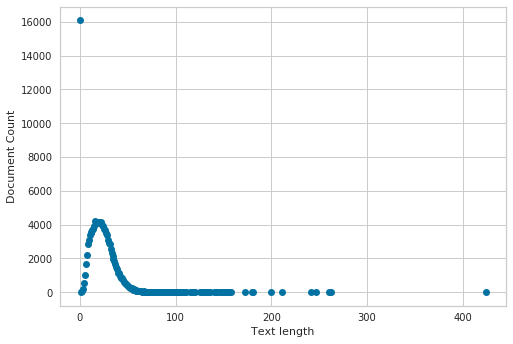

(135796, 35455)


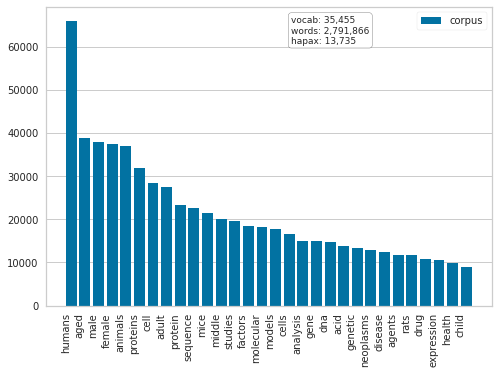

Feature:  text average token length: 127.21277504492032
max token length:  604
min token length:  0
135796
[['energetics', 'primary', 'processes', 'visula', 'escitation', 'photocalorimetry', 'rhodopsin', 'rod', 'outer', 'segment', 'membranes', 'sensitive', 'technique', 'direct', 'calorimetric', 'determination', 'energetics', 'photochemical', 'reactions', 'low', 'levels', 'illumination', 'application', 'study', 'primary', 'processes', 'visula', 'excitation', 'described', 'enthlpies', 'reported', 'various', 'steps', 'bleaching', 'rhodopsin', 'intact', 'rod', 'outer', 'segment', 'membranes', 'together', 'heats', 'appropriate', 'model', 'reactions', 'protonation', 'changes', 'also', 'determined', 'calorimetrically', 'use', 'buffers', 'differing', 'heats', 'proton', 'ionization', 'bleaching', 'rhodopsin', 'accompanied', 'significant', 'uptake', 'heat', 'energy', 'vastly', 'excess', 'energy', 'required', 'simple', 'isomerization', 'retinal', 'chromophore', 'metarhodopsin', 'formation', 'invo

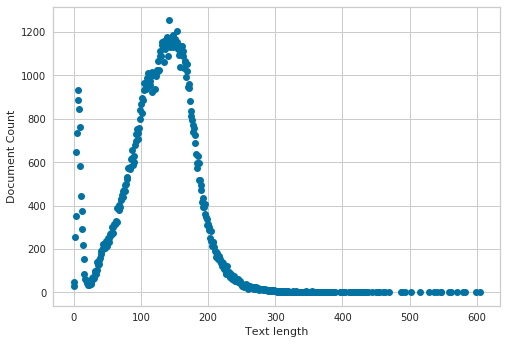

(135796, 174991)


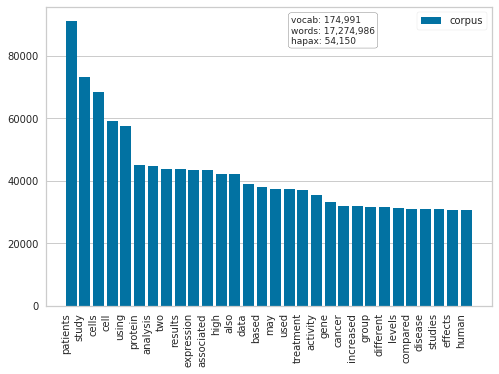

In [12]:
''' plot paper details'''
import collections
import matplotlib.pyplot as plt
from yellowbrick.text import FreqDistVisualizer
from sklearn.feature_extraction.text import CountVectorizer

for feature in text_features:
    if text_process_status=="before_preprocess":
        cutoff= 1
        cleaned_feature, feature_token_size = com_func.clean_batch_of_raw(documents[feature], 
                                                                          stopword=False, 
                                                                          word_min_length = 1,
                                                                          only_letter = False)
    elif text_process_status=="after_preprocess":
        cleaned_feature, feature_token_size = com_func.clean_batch_of_raw(documents[feature], 
                                                                          stopword=True, 
                                                                          word_min_length = 2,
                                                                          only_letter = True)
    else:
        break
    print("Feature: ",feature, "average token length:", np.sum(feature_token_size)/len(feature_token_size))
    print("max token length: ", max(feature_token_size))
    print("min token length: ", min(feature_token_size))
    # collect some statistic
    print(len(cleaned_feature))
    print(cleaned_feature[:2])
    print(allpid[:2])
    
    # ----------- plot text length distribution --------- #
    save_path = "../plot/text_length_dist/"
    if not os.path.exists(save_path):
        os.mkdir(save_path)
    plot_name = feature + "_text_length_dist_"+text_process_status+"_sample="+training_sample_size
    doclength_counter = collections.Counter(feature_token_size)
    doclength_dist=sorted(doclength_counter.items())
    print(doclength_dist)
    document_size = []
    sample_num = []
    for value in doclength_dist:
        document_size.append(value[0])
        sample_num.append(value[1])
    plt.plot(document_size, sample_num, 'bo')
    plt.xlabel('Text length')
    plt.ylabel('Document Count')
    plt.savefig(save_path+plot_name+".png", dpi=300)
    plt.savefig(save_path+plot_name+".eps", dpi=300)
    plt.show()
    
    # ----------plot top word frequence distribution ---- #
    save_path = "../plot/token_freq_dist/"
    if not os.path.exists(save_path):
        os.mkdir(save_path)
    plot_name = feature + "_token_freq_dist_"+text_process_status+"_sample="+training_sample_size
    vectorizer = CountVectorizer(min_df = cutoff, analyzer='word', tokenizer=dummy,preprocessor=dummy)
    count_matrix = vectorizer.fit_transform(cleaned_feature)
    print(count_matrix.shape)
    features = vectorizer.get_feature_names()
    visualizer = FreqDistVisualizer(features=features, n=30, orient="v")
    visualizer.fit(count_matrix)
    visualizer.finalize()
    # change textbox position
    visualizer.ax.texts[0].set_position((0.55, 0.97))
    visualizer.set_title("")
    plt.savefig(save_path+plot_name+".png", dpi=300)
    plt.savefig(save_path+plot_name+".eps", dpi=300)
    plt.show()
    plt.close('all')

In [ ]:
''' TF embedding'''
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

for feature in text_features:
    cleaned_feature, feature_token_size = com_func.clean_batch_of_raw(documents[feature], 
                                                                      stopword=True, 
                                                                      word_min_length = 2,
                                                                      only_letter = True)
    print("Feature: ",feature, "average token length:", np.sum(feature_token_size)/len(feature_token_size))
    print("max token length: ", max(feature_token_size))
    print("min token length: ", min(feature_token_size))
    # collect some statistic
    print(len(cleaned_feature))
    print(cleaned_feature[:2])
    print(allpid[:2])
    
    # convert raw text to numerical feature vectors (TF)
    # unigram are used
    tf_vectorizer = TfidfVectorizer(use_idf=False, sublinear_tf=True, norm="l2",stop_words = None, min_df=cutoff,
                                    analyzer='word', tokenizer=dummy,preprocessor=dummy, max_features = 50000)
    # train a dictionary to build a tf with log normalization
    tf_matrix = tf_vectorizer.fit_transform(cleaned_feature)
    print(len(tf_vectorizer.vocabulary_))
    print(tf_matrix.shape)
    print(tf_matrix[0].nonzero())
    print(tf_matrix[0])
    # save the model for log normalized tf
    modelSaveDir = "models/"+Dataset+"/tf/"+feature+"_sample="+training_sample_size+"/"
    if not os.path.exists(modelSaveDir):
        os.makedirs(modelSaveDir)
    pickle.dump(tf_vectorizer, open(modelSaveDir+"log_normalized_tf_model.pickle", "wb"))
    pickle.dump(tf_matrix, open(modelSaveDir+"tf_features.pickle", "wb"))
    pickle.dump(allpid, open(modelSaveDir+"feature_pid.pickle", "wb"))

In [ ]:
''' TF-IDF, LSA embedding '''
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

for feature in text_features:
    cleaned_feature, feature_token_size = com_func.clean_batch_of_raw(documents[feature], 
                                                                      stopword=True, 
                                                                      word_min_length = 2,
                                                                      only_letter = True)
    print("Feature: ",feature, "average token length:", np.sum(feature_token_size)/len(feature_token_size))
    print("max token length: ", max(feature_token_size))
    print("min token length: ", min(feature_token_size))
    # collect some statistic
    print(len(cleaned_feature))
    print(cleaned_feature[:2])
    print(allpid[:2])
    
    
    # calculate tf-idf
    # tf = sublinear tf, 1+log(tf) if tf >0, or 0. idf = (log(1+N)/df(t,d,C)) + 1
    # df(d,t,C) means number of document d contain term t in collection C
    # Each row is normalized to have unit Euclidean norm 
    # reference to http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
    tfidf_vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True, sublinear_tf=True, norm="l2", min_df=cutoff,
                                       max_features = 50000, analyzer='word', tokenizer=dummy,preprocessor=dummy, 
                                       stop_words = None)
    tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_feature)
    print(len(tfidf_vectorizer.vocabulary_))
    print(tfidf_matrix.shape)
    # save model
    modelSaveDir = "models/"+Dataset+"/tf_idf/"+feature+"_sample="+training_sample_size+"/"
    if not os.path.exists(modelSaveDir):
        os.makedirs(modelSaveDir)
    pickle.dump(tfidf_vectorizer, open(modelSaveDir+"tf_idf_Vectorizer.pickle", "wb"))
    pickle.dump(tfidf_matrix, open(modelSaveDir+"tf_idf_trained_features.pickle", "wb"))
    pickle.dump(allpid, open(modelSaveDir+"feature_pid.pickle", "wb"))
    
    
    # LSA
    from sklearn.decomposition import TruncatedSVD
    svd = TruncatedSVD(n_components=100)
    final_lsa_Matrix = svd.fit_transform(tfidf_matrix)
    print(final_lsa_Matrix.shape)
    # save the trained LSA
    modelSaveDir = "models/"+Dataset+"/lsa/"+feature+"_sample="+training_sample_size+"/"
    if not os.path.exists(modelSaveDir):
        os.makedirs(modelSaveDir)
    pickle.dump(final_lsa_Matrix, open(modelSaveDir+"lsa_Matrix.pickle", "wb"))
    pickle.dump(allpid, open(modelSaveDir+"feature_pid.pickle", "wb"))

In [ ]:
# train the model
def train_d2v_model(formated_doc, alg=0, min_term_count=1):
    cores = multiprocessing.cpu_count()
    # train model
    # size is dimension of vector return, dm defines training algorithm, when dm = 1 is distributed memory (PV-DM),
    # pv-dbow is better than pv-md
    # when dm = 0 is distributed bag of words (PV-DBOW), 
    # sample is threshold for configuring which higher-frequency words are randomly downsampled, 
    # min_count is ignore threshold (Ignores all words with total frequency lower than min_count)
    model = gensim.models.Doc2Vec(formated_doc, dm=alg, vector_size=100, negative=5, window=5, min_count=min_term_count,
                                  epochs=20, sample=1e-3, workers=cores)
    return model

In [ ]:
import unicodedata
import string
valid_filename_chars = "-_.,() %s%s" % (string.ascii_letters, string.digits)
char_limit = 255
def clean_filename(filename, whitelist=valid_filename_chars, replace=' '):
    # replace spaces
    for r in replace:
        filename = filename.replace(r,'_')
    
    # keep only valid ascii chars
    cleaned_filename = unicodedata.normalize('NFKD', filename).encode('ASCII', 'ignore').decode()
    
    # keep only whitelisted chars
    cleaned_filename = ''.join(c for c in cleaned_filename if c in whitelist)
    if len(cleaned_filename)>char_limit:
        print("Warning, filename truncated because it was over {}. Filenames may no longer be unique".format(char_limit))
    return cleaned_filename[:char_limit]

In [ ]:
''' doc2vec (PV-DM, PV-DBOW)'''
import gensim
import multiprocessing
from gensim.models.doc2vec import TaggedDocument

cores = multiprocessing.cpu_count()

for feature in text_features:
    cleaned_feature, feature_token_size = com_func.clean_batch_of_raw(documents[feature], 
                                                                      stopword=True, 
                                                                      word_min_length = 2,
                                                                      only_letter = True)
    print("Feature: ",feature, "average token length:", np.sum(feature_token_size)/len(feature_token_size))
    print("max token length: ", max(feature_token_size))
    print("min token length: ", min(feature_token_size))
    # collect some statistic
    print(len(cleaned_feature))
    print(cleaned_feature[:2])
    print(allpid[:2])
    
    # doc2vec
    formated_doc = []
    
    for paper in zip(allpid, cleaned_feature):
        formated_doc.append(TaggedDocument(words = paper[1], tags = [paper[0]]))
    print(formated_doc[:3])
    print(len(formated_doc))
    
    # pv_dbow
    model_pv_dbow = train_d2v_model(formated_doc,alg=0, min_term_count=cutoff)
    # save model
    newfileDir = "models/"+Dataset+"/pv_dbow/"+feature+"_sample="+training_sample_size+"/"
    if not os.path.exists(newfileDir):
        os.makedirs(newfileDir)
    modelname = model_pv_dbow.__str__()
    print("Saving model ", modelname)
    model_pv_dbow.save(newfileDir+modelname)
    print("Done")
    model_pv_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    
    # pv_dm
    model_pv_dm = train_d2v_model(formated_doc,alg=1, min_term_count=cutoff)
    print(model_pv_dm.__str__())
    print(clean_filename(model_pv_dm.__str__()))
    
    # save model
    newfileDir = "models/"+Dataset+"/pv_dm/"+feature+"_sample="+training_sample_size+"/"
    if not os.path.exists(newfileDir):
        os.makedirs(newfileDir)
    modelname = clean_filename(model_pv_dm.__str__())
    print("Saving model ", newfileDir+modelname)
    model_pv_dm.save(newfileDir+modelname)
    print("Done")
    model_pv_dm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

# Train all embedding in once

In [ ]:
import matplotlib.pyplot as plt
from yellowbrick.text import FreqDistVisualizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

import pickle
# convert tokenized text to TaggedDocument
import gensim
import multiprocessing
from gensim.models.doc2vec import TaggedDocument

cores = multiprocessing.cpu_count()

# text_features = ["title", "abstract", "keywords_mesh", "text"]
text_features = ["text"]
allpid = documents["paperID"].tolist()
for feature in text_features:
    # unprocess pram cutoff= 1 (stopword=False, word_min_length = 1,only_letter = False)
    cleaned_feature, feature_token_size = com_func.clean_batch_of_raw(documents[feature], 
                                                                      stopword=True, 
                                                                      word_min_length = 2,
                                                                      only_letter = True)
    print("Feature: ",feature, "average token length:", np.sum(feature_token_size)/len(feature_token_size))
    print("max token length: ", max(feature_token_size))
    print("min token length: ", min(feature_token_size))
    # collect some statistic
    print(len(cleaned_feature))
    print(cleaned_feature[:2])
    print(allpid[:2])
    
    #axes = plt.gca()
    vectorizer = CountVectorizer(min_df = cutoff, analyzer='word', tokenizer=dummy,preprocessor=dummy)
    count_matrix = vectorizer.fit_transform(cleaned_feature)
    features = vectorizer.get_feature_names()
    visualizer = FreqDistVisualizer(features=features, n=30, orient="v")
    visualizer.fit(count_matrix)
    visualizer.set_title("Frequency distribution after data preprocessing")
    save_path = "../plot/token_freq_dist(new)/"
    if not os.path.exists(save_path):
        os.mkdir(save_path)
    plot_name = feature + "_token_freq_dist_after_preprocess_sample="+training_sample_size+".png"
    visualizer.finalize()
    # change textbox position
    visualizer.ax.texts[0].set_position((0.55, 0.97))
    plt.savefig(save_path+plot_name, dpi=300)
    plt.show()
    plt.close('all')
    print(count_matrix.shape)
    
    # convert raw text to numerical feature vectors (TF)
    # unigram are used
    tf_vectorizer = TfidfVectorizer(use_idf=False, sublinear_tf=True, norm="l2",stop_words = None, min_df=cutoff,
                                    analyzer='word', tokenizer=dummy,preprocessor=dummy, max_features = 50000)
    # train a dictionary to build a tf with log normalization
    tf_matrix = tf_vectorizer.fit_transform(cleaned_feature)
    print(len(tf_vectorizer.vocabulary_))
    print(tf_matrix.shape)
    print(tf_matrix[0].nonzero())
    print(tf_matrix[0].toarray())
    print(tf_matrix[0])
    # save the model for log normalized tf
    modelSaveDir = "models/"+Dataset+"/tf/"+feature+"_sample="+training_sample_size+"/"
    if not os.path.exists(modelSaveDir):
        os.makedirs(modelSaveDir)
    pickle.dump(tf_vectorizer, open(modelSaveDir+"log_normalized_tf_model.pickle", "wb"))
    pickle.dump(tf_matrix, open(modelSaveDir+"tf_features.pickle", "wb"))
    pickle.dump(allpid, open(modelSaveDir+"feature_pid.pickle", "wb"))
    
    
    # calculate tf-idf
    # tf = sublinear tf, 1+log(tf) if tf >0, or 0. idf = (log(1+N)/df(t,d,C)) + 1
    # df(d,t,C) means number of document d contain term t in collection C
    # Each row is normalized to have unit Euclidean norm 
    # reference to http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
    tfidf_vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True, sublinear_tf=True, norm="l2", min_df=cutoff,
                                       max_features = 50000, analyzer='word', tokenizer=dummy,preprocessor=dummy, 
                                       stop_words = None)
    tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_feature)
    print(len(tfidf_vectorizer.vocabulary_))
    print(tfidf_matrix.shape)
    # save model
    modelSaveDir = "models/"+Dataset+"/tf_idf/"+feature+"_sample="+training_sample_size+"/"
    if not os.path.exists(modelSaveDir):
        os.makedirs(modelSaveDir)
    pickle.dump(tfidf_vectorizer, open(modelSaveDir+"tf_idf_Vectorizer.pickle", "wb"))
    pickle.dump(tfidf_matrix, open(modelSaveDir+"tf_idf_trained_features.pickle", "wb"))
    pickle.dump(allpid, open(modelSaveDir+"feature_pid.pickle", "wb"))
    
    
    # LSA
    from sklearn.decomposition import TruncatedSVD
    svd = TruncatedSVD(n_components=100)
    final_lsa_Matrix = svd.fit_transform(tfidf_matrix)
    print(final_lsa_Matrix.shape)
    # save the trained LSA
    modelSaveDir = "models/"+Dataset+"/lsa/"+feature+"_sample="+training_sample_size+"/"
    if not os.path.exists(modelSaveDir):
        os.makedirs(modelSaveDir)
    pickle.dump(final_lsa_Matrix, open(modelSaveDir+"lsa_Matrix.pickle", "wb"))
    pickle.dump(allpid, open(modelSaveDir+"feature_pid.pickle", "wb"))
    
    # doc2vec
    formated_doc = []
    
    for paper in zip(allpid, cleaned_feature):
        formated_doc.append(TaggedDocument(words = paper[1], tags = [paper[0]]))
    print(formated_doc[:3])
    print(len(formated_doc))
    
    # pv_dbow
    model_pv_dbow = train_d2v_model(formated_doc,alg=0, min_term_count=cutoff)
    # save model
    newfileDir = "models/"+Dataset+"/pv_dbow/"+feature+"_sample="+training_sample_size+"/"
    if not os.path.exists(newfileDir):
        os.makedirs(newfileDir)
    modelname = model_pv_dbow.__str__()
    print("Saving model ", modelname)
    model_pv_dbow.save(newfileDir+modelname)
    print("Done")
    model_pv_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    
    # pv_dm
    model_pv_dm = train_d2v_model(formated_doc,alg=1, min_term_count=cutoff)
    print(model_pv_dm.__str__())
    print(clean_filename(model_pv_dm.__str__()))
    
    # save model
    newfileDir = "models/"+Dataset+"/pv_dm/"+feature+"_sample="+training_sample_size+"/"
    if not os.path.exists(newfileDir):
        os.makedirs(newfileDir)
    modelname = clean_filename(model_pv_dm.__str__())
    print("Saving model ", newfileDir+modelname)
    model_pv_dm.save(newfileDir+modelname)
    print("Done")
    model_pv_dm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [ ]:
sample=0.01 downsamples 0 most-common words
sample=0.001 downsamples 13 most-common words
sample=0.0001 downsamples 678 most-common words